# <center> Майнор "Интеллектуальный анализ данных" <center>

# <center> Курс "Современные методы машинного обучения" <center>

# <center> Ensemble learning methods: Boosting <center>

## Initial setup

In [1]:
import numpy as np
import pandas as pd

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# стиль seaborn
# style.available выводит все доступные стили
#from matplotlib import style
#style.use('seaborn')

#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

## Titanic data

Продолжаем работать с данными по пассажирам Титаника.  
Будем использовать уже модифицированные данные (см `DT_CV_ParamTune.ipynb`)

In [2]:
titanic_data = pd.read_csv('titanic_train_mod.csv')
titanic_data.head(10)

,PassengerId,Survived,Age,SibSp,Parch,Fare,is_cabin_missed,is_age_missed,Ticket_number,is_male,Pclass__1,Pclass__2,Pclass__3,Embarked__C,Embarked__Q,Embarked__S,Title__Miss,Title__Mr,Title__Mrs,Title__Other
0,1,0,22.0,1,0,7.2500,1,0,21171,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,2,1,38.0,1,0,71.2833,0,0,17599,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,26.0,0,0,7.9250,1,0,3101282,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,4,1,35.0,1,0,53.1000,0,0,113803,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5,0,35.0,0,0,8.0500,1,0,373450,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,6,0,0.0,0,0,8.4583,1,1,330877,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
6,7,0,54.0,0,0,51.8625,0,0,17463,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,8,0,2.0,3,1,21.0750,1,0,349909,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,9,1,27.0,0,2,11.1333,1,0,347742,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,10,1,14.0,1,0,30.0708,1,0,237736,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 20 columns):
PassengerId        889 non-null int64
Survived           889 non-null int64
Age                889 non-null float64
SibSp              889 non-null int64
Parch              889 non-null int64
Fare               889 non-null float64
is_cabin_missed    889 non-null int64
is_age_missed      889 non-null int64
Ticket_number      889 non-null int64
is_male            889 non-null float64
Pclass__1          889 non-null float64
Pclass__2          889 non-null float64
Pclass__3          889 non-null float64
Embarked__C        889 non-null float64
Embarked__Q        889 non-null float64
Embarked__S        889 non-null float64
Title__Miss        889 non-null float64
Title__Mr          889 non-null float64
Title__Mrs         889 non-null float64
Title__Other       889 non-null float64
dtypes: float64(13), int64(7)
memory usage: 139.0 KB


## Алгоритм AdaBoost

Сперва разделим данные на обучающие и тестовые. Возьмем тот же seed, что и с деревьями решений.

In [4]:
from sklearn.model_selection import train_test_split

C:\Users\kazakov.m\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\fixes.py:313: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  _nan_object_mask = _nan_object_array != _nan_object_array


In [5]:
Data = titanic_data.drop(['PassengerId', 'Survived'], axis=1)
label = titanic_data['Survived']

In [6]:
(trainData, 
 testData, 
 train_label, 
 test_label) = train_test_split(Data,
                                label,
                                test_size=0.3, 
                                random_state=56428234)

In [7]:
print('Size of train set:', trainData.shape)
print('Size of test set:', testData.shape)

Size of train set: (622, 18)
Size of test set: (267, 18)


In [8]:
print('Class distribution on train:',
      train_label.value_counts(normalize=True),
      '\nClass distribution on test:', 
      test_label.value_counts(normalize=True),
      sep='\n')

Class distribution on train:
0    0.623794
1    0.376206
Name: Survived, dtype: float64

Class distribution on test:
0    0.602996
1    0.397004
Name: Survived, dtype: float64


<br>
<br>
Применим AdaBoost с дефолтными параметрами

In [9]:
from sklearn.ensemble import AdaBoostClassifier

In [10]:
ab_model = AdaBoostClassifier()

ab_model.fit(trainData, train_label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

Оценим качество

In [11]:
from sklearn import metrics
from plot_cm import plot_confusion_matrix

In [12]:
def get_model_quality(test_label, preds):
    print("Accuracy:",
      round(metrics.accuracy_score(test_label, preds), 5),
     '\nBalanced accuracy:',
     round(metrics.balanced_accuracy_score(test_label, preds), 5))

    print()
    print(metrics.classification_report(test_label, preds))

    plot_confusion_matrix(cm=metrics.confusion_matrix(test_label, preds),
                          target_names=['0', '1'],
                          normalize=True)

Accuracy: 0.8015 
Balanced accuracy: 0.79995

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       161
           1       0.73      0.79      0.76       106

   micro avg       0.80      0.80      0.80       267
   macro avg       0.79      0.80      0.80       267
weighted avg       0.81      0.80      0.80       267



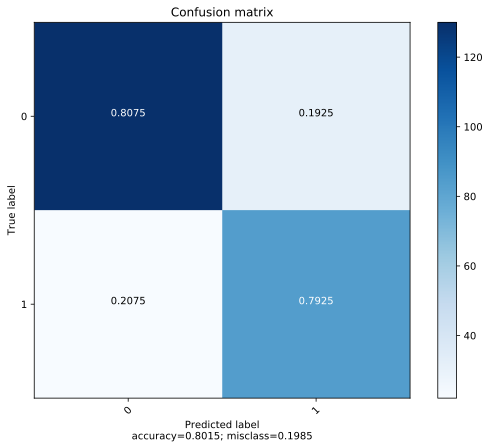

In [13]:
get_model_quality(test_label, ab_model.predict(testData))

Проверим устойчивость решения:

Accuracy: 0.8015 
Balanced accuracy: 0.79995

              precision    recall  f1-score   support

           0       0.86      0.81      0.83       161
           1       0.73      0.79      0.76       106

   micro avg       0.80      0.80      0.80       267
   macro avg       0.79      0.80      0.80       267
weighted avg       0.81      0.80      0.80       267



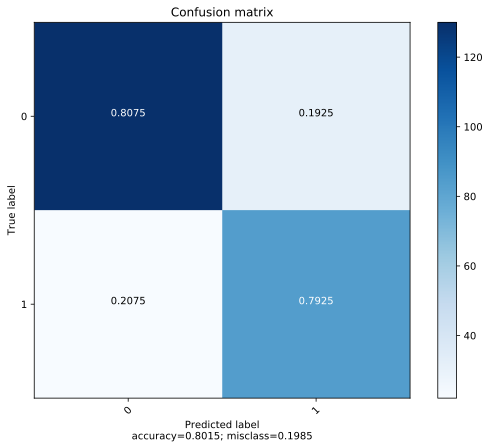

In [14]:
ab_model = AdaBoostClassifier()
ab_model.fit(trainData, train_label)
get_model_quality(test_label, ab_model.predict(testData))

### Задание  
  
Оцените качество модели на кросс-валидации. Используйте метрику F1-score.

### Base estimators

Пусть в качестве базового классификатора будет логистическая регрессия

In [39]:
# Отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

In [36]:
from sklearn.linear_model import  LogisticRegression

In [37]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
lg_model = LogisticRegression()
ab_model = AdaBoostClassifier(base_estimator=lg_model)

In [40]:
ab_scores = pd.Series(cross_val_score(ab_model, Data, label, cv=rskf, scoring='f1_micro'))

In [41]:
ab_scores.describe()

count    50.000000
mean      0.804727
std       0.022968
min       0.747191
25%       0.787628
50%       0.808989
75%       0.820225
max       0.853107
dtype: float64

Или то же дерево решений, но глубины 2

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
dtree_model = DecisionTreeClassifier(max_depth=2)
ab_model = AdaBoostClassifier(base_estimator=dtree_model)

In [56]:
ab_scores = pd.Series(cross_val_score(ab_model, Data, label, cv=rskf, scoring='f1_micro'))
ab_scores.describe()

count    50.000000
mean      0.794499
std       0.027542
min       0.719101
25%       0.770750
50%       0.792135
75%       0.814607
max       0.848315
dtype: float64

### Задание  
  
Оцените качество классификации для различной (от 1 до 10) глубины дерева решения, используемого в качестве base_estimator.

### Number of estimators

Мы можем, как и в Random Forest получить доступ к каждому дереву в ансамбле. 

In [61]:
ab_model = AdaBoostClassifier()
ab_model.fit(trainData, train_label)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [77]:
estim_scores = []

for x in ab_model.estimators_:
    estim_scores.append(metrics.f1_score(test_label, 
                                         x.predict(testData)))

estim_scores = pd.Series(estim_scores)

А можем получить предсказания на каждом уровне ансамбля

In [78]:
staged_scores = []

for x in ab_model.staged_predict(testData):
    staged_scores.append(metrics.f1_score(test_label, x))
    
staged_scores = pd.Series(staged_scores)

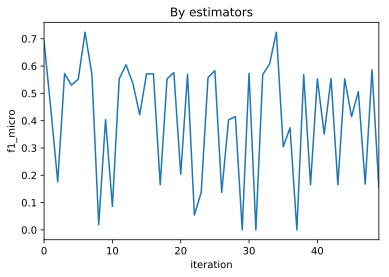

In [79]:
estim_scores.plot()

plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.title('By estimators')
plt.show()

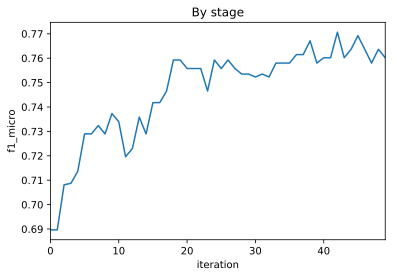

In [80]:
staged_scores.plot()

plt.ylabel('f1_micro')
plt.xlabel('iteration')

plt.title('By stage')
plt.show()

### Задание  
  
Оцените на 5-fold валидации, как меняется качество модели на обучающей и на тестовой выборках при добавлении каждого дерева. Провизуализируйте результаты.

### Hyperparameters tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [84]:
params = {
    'base_estimator__criterion' : ['gini', 'entropy'],
    'base_estimator__splitter' :   ['best', 'random'],
    'base_estimator__max_depth': range(1, 6),
    'n_estimators': range(10,101,10),
    'learning_rate': [0.5, 0.6, 0.7, 0.8, 0.9, 1]
}

In [85]:
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
dtree_model = DecisionTreeClassifier()
ab_model = AdaBoostClassifier(base_estimator=dtree_model)
clf = GridSearchCV(ab_model, params, cv=rskf, scoring='f1_micro', n_jobs=1)

In [ ]:
%%time
clf.fit(Data, label)

In [ ]:
clf.best_score_

In [ ]:
clf.best_params_

### Задание  
  
Оцените на 5-fold валидации, как меняется качество модели на обучающей и на тестовой выборках при добавлении каждого дерева для различных learning_rate: [0.1, 0.5, 0.9]. Провизуализируйте результаты.